Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
# import packages 
import pandas as pd
import numpy as np 

# load datasets
train_data = pd.read_csv("train.csv")
train_data.head(n=20) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
test_data = pd.read_csv("test.csv")
test_data.head() # the default value for the head function is 5

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Exploring

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
women = train_data.loc[train_data.Sex == 'female']["Survived"] 
# loc function will return the Survived column in the data_train only for Sex=female
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)
#this my code to better understanding of .loc function
surv = train_data.loc[train_data.Survived]["Sex"]
surv.head()

% of women who survived: 0.7420382165605095


0      male
1    female
1    female
1    female
0      male
Name: Sex, dtype: object

In [7]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


<AxesSubplot:xlabel='Age', ylabel='Survived'>

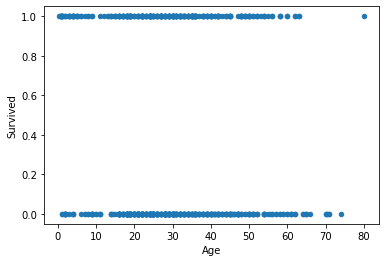

In [8]:
train_data.plot(kind='scatter', y='Survived', x='Age')

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

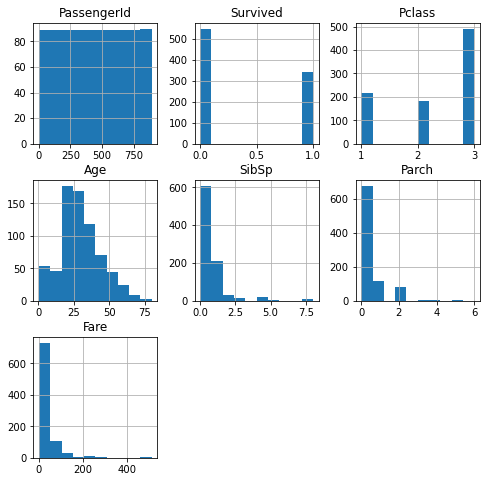

In [9]:
train_data.hist(figsize=(8,8))

## Dataset Cleaning

**For the training dataset:**  
The "Age" column has nulls which can be replaced by the average value or the median   
The "Cabin" column has significant number of nulls, so I am going to drop it for now  
The "Embarked" column has minior number of nulls, so I am going to replace it with the median  

**For the test dataset:**  
The "Age" column nulls can also be replaced by the average value or the median   
The "Cabin" column, I am going to drop it also  
The "Fare" column nulls can be replaced by the mean or median 

In [10]:
# replacing the nulls in the Age column
value = train_data["Age"].mean() 
train_data["Age"].fillna(value=value, inplace=True)

# replacing the nulls in the Embarked column
value= train_data["Embarked"].value_counts().idxmax()
train_data["Embarked"].fillna(value=value, inplace=True)

# droping the Cabin column 
train_data.drop(columns="Cabin", inplace=True)

# checking the train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [11]:
# repeating the same with the test dat

test_data_edited = test_data.copy()

# replacing the nulls in the Age column
value = test_data_edited["Age"].mean() 
test_data_edited["Age"].fillna(value=value, inplace=True)

# replacing the nulls in the Fare column
value= test_data_edited["Fare"].value_counts().idxmax()
test_data_edited["Fare"].fillna(value=value, inplace=True)

# droping the Cabin column 
test_data_edited.drop(columns="Cabin", inplace=True)

# checking the train_data
test_data_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [12]:
# droping the uneffective features and output column "Survived" for both the training and testing data
X_train = train_data.drop(columns=["PassengerId", "Name", "Ticket", "Survived"], inplace=False)
X_test = test_data_edited.drop(columns=["PassengerId", "Name", "Ticket"], inplace=False)

# get dummies --> Convert categorical variable into dummy/indicator variables.

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [13]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


### The Learing Model

**First model**  
Just using less number of features, by using the features that do not have any null

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
y = train_data["Survived"]


# just using the features that do not have any null, so less number of features
features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train_less = pd.get_dummies(train_data[features])
X_test_less = pd.get_dummies(test_data[features])

model_less = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model_less.fit(X_train_less, y)
predictions_less = model_less.predict(X_test_less)




In [15]:
# testing the model for different values of max_depth

max_depth_list= [5, 6, 7, 10]
for depth in max_depth_list:
    model_less=RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=1)
    model_less.fit(X_train_less, y)
    train_pred=model_less.predict(X_train_less)
    mae = mean_absolute_error(train_pred, y)
    print(mae)

0.1840628507295174
0.1840628507295174
0.1829405162738496
0.1829405162738496


**Second model**  
By using the edited and cleaned train and test datasets

**Competition Submission**  
this edit for features (replacing the nulls) changed my rank from 33796/50375 to 3516/50375  
and changed my score from 0.76794 to 0.77990


In [21]:
model=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y)
predictions = model.predict(X_test)

train_pred=model.predict(X_train)
mae = mean_absolute_error(train_pred, y)
print(mae)

0.15600448933782268


In [20]:
# saving the predictions of the test_data for competition submission on kaggle.com
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)